###### Reading the required libraries

In [717]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import  explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import  mean_squared_log_error, median_absolute_error

###### Reading the file From the Path

## Personal Laptop Path
pd.set_option("display.max_columns", 2000)
os.chdir('C:\\Users\\KASTU1\\Desktop\\Analytics Path\\Data\\Kaggle\\HousePricePrediction')
hp=pd.read_csv('house_pricing_kaggle.csv',sep='|')
hp.head()

In [718]:
## Office Laptop Path
pd.set_option("display.max_columns", 2000)
os.chdir('C:\\Users\\Prudhvi\\Desktop\Prudhvi\\Data Science\\Kaggle')
hp=pd.read_csv('house_pricing_kaggle.csv')
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###### Deriving a columns
###### Deriving a new column (Age_House) called age of house by subtracting the YearBuilt from the current year
###### Deriving a new column (Remod_Age_House) called age of house by subtracting the YearBuilt from the current year

In [719]:
# Derving the columns
hp['Age_House']=2018-hp['YearBuilt']
hp['Remod_Age_House']=2018-hp['YearRemodAdd']

###### Imputing missing values

In [720]:
## Imputing missing with the intution on the dataset
hp['BsmtQual'].fillna(value='No Basement',inplace=True)
hp['BsmtCond'].fillna(value='No Basement',inplace=True)
hp['BsmtExposure'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType1'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType2'].fillna(value='No Basement',inplace=True)
hp['GarageType'].fillna(value='No Garage',inplace=True)
hp['GarageYrBlt'].fillna(value='9999',inplace=True)
hp['GarageFinish'].fillna(value='No Garage',inplace=True)
hp['GarageQual'].fillna(value='No Garage',inplace=True)
hp['GarageCond'].fillna(value='No Garage',inplace=True)
hp['FireplaceQu'].fillna(value='No FirePlace',inplace=True)
hp['MasVnrType'].fillna(value='None',inplace=True)
hp['MasVnrArea'].fillna(value=0,inplace=True)
hp['LotFrontage'].fillna(value=0,inplace=True)
hp['Electrical'].fillna(value='None',inplace=True)

###### Functions for Prepocessing 
drop_columns ## To drop the columns; 
       Input parametes:df and dimensions (list)
       Return: NA
drop_unique  ## To drop the columns which contains only one unique value; 
       Input Parameters: df
       Return: NA
datatypecoversion ## To convert one data type to other ; 
       Input Parameters: Conversion_list, df, datatype
       Return: NA
numeric_datatype ## To save all the numeric data types to a list; 
       Input Parameters: df
       Return: list (numeric_dimensions)
object_datatype ## To save all the objec character data types to a list; 
       Input Parameters: df
       Return: list (object_dimensions)

correlation: To check the correlation between the input variable and output variable
       Input Parameters: df,numeric_dimensions(list),output_dim
       Return: NA


In [721]:
## Function to find the dimensions which has only one unique column
def drop_column(x,dimensions):
    for i in dimensions:
        x.drop(i,axis=1, inplace=True)
        
#***********************End of Function****************************#      

#  Function to the dimension which contains only one unique values
def drop_unique(x):
    unique_dimensions=[]
    z=0
    for i in x.columns:
        if(x[i].nunique==1):
            x.drop(i,axis=1,inplace=True)
            z+=1
    print('Total # of columns which has only one record: ',z)

#***********************End of Function****************************#    

## Function to covert the data type of the columns
def datatypecoversion(coversion_list,x,datatype):
    for i in coversion_list:
        x[i]=x[i].astype(datatype)

## FUNCTION TO GET THE NUMERIC DATATYPE DIMENSIONS
def numeric_datatype(x):
    numeric_dimensions=[]
    for i in x.columns:
        if(x[i].dtype=='int64' or x[i].dtype=='float64'):
            numeric_dimensions.append(i) 
    return numeric_dimensions

#***********************End of Function****************************#    

def object_datatype(x):
    object_dimensions=[]
    for i in x.columns:
        if(x[i].dtype=='object'):
            object_dimensions.append(i) 
    return object_dimensions

#***********************End of Function****************************#  

## Function to Get the Dimension which dont have correlation between -0.5 to 0.5 with the Output Variable
## Prerequisite: Execute the numeric function before using this function

def correlation(x,numeric_dimensions,output_dim):
    deleted_correlation=[]
    for i in numeric_dimensions:
        if(i != output_dim):
            a=x[[i,output_dim]].corr()
            a.loc[i,output_dim]
            if((a.loc[i,output_dim]> -0.5) and (a.loc[i,output_dim]<0.5)):
                print('Correlation ',i,' vs', output_dim,':',a.loc[i,output_dim])
                hp.drop(i,axis=1,inplace=True)
                deleted_correlation.append(i)
    #return deleted_correlation
   # print('Dimensions which has high correlation with the ', output_dim,' variable are',x.select_dtypes(include=[x.number]).dtypes)
#***********************End of Function****************************#    

## Function to caliculate mse, rmse, var_score, r-square,mae,msle,mad
def get_regression_metrics(actualVal, predVal):
    mse = mean_squared_error(actualVal, predVal)
    print("Mean squared error: %.2f"
      % mse )
    
    rmse = np.sqrt(mean_squared_error(actualVal, predVal))
    print("Root Mean squared error: %.2f"
      % rmse )

    var_score = explained_variance_score(actualVal, predVal)
    print("Explained Variance: %.2f"
      % var_score )

    r2 = r2_score(actualVal, predVal)
    print("R2 Score: %.2f"
      % r2 )
    
    mae = mean_absolute_error(actualVal, predVal)
    print("Mean Absolute error: %.2f"
      % mae )

    msle = mean_squared_log_error(actualVal, predVal)
    print("Mean Squared Log error: %.2f"
      % msle )

    med_ae = median_absolute_error(actualVal, predVal)
    print("Median Absolute error: %.2f"
      % med_ae )
    
    error_metrics = {"MSE" : mse,
                    "RMSE" : rmse,
                    "Variance_Score" : var_score, 
                    "R2" : r2, 
                    "Mean_Abs_Err" : mae,
                    "Mean_Sqr_Log_Err" : msle,
                    "Median_Abs_Err" : med_ae
                    }
    return error_metrics
#***********************End of Function****************************#  

def get_metric_df(ActualLogValue,PredictedLogValue):
    df = pd.DataFrame({"ActualLogValue" : ActualLogValue, 
              "PredictedLogValue" : PredictedLogValue , 
              "PredcitedValue": np.exp(PredictedLogValue), 
              "ActualValue" : np.exp(ActualLogValue)})
    df["Error"] = df["ActualValue"] - df["PredcitedValue"] 
    df["Error_per"] = np.abs((df["ActualValue"]-
                              df["PredcitedValue"])*100/(df["ActualValue"]))

    bins = np.linspace(0, 100, 7)
    df["Error_per_cls"] = np.digitize(df["Error_per"], bins)

    return df


In [722]:
drop_dimensions=['PoolQC','Fence','Alley','MiscFeature','Id','YrSold','YearBuilt','YearRemodAdd',
                 'Utilities','1stFlrSF','TotRmsAbvGrd']
## Calling drop_column function
drop_column(hp,drop_dimensions)

# Calling drop unique function
drop_unique(hp)

## Calling datatypeconversion function
to_Object_conversion_list=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
                            'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces',
                               'GarageCars','MoSold']
datatypecoversion(to_Object_conversion_list,hp,'object')

# Calling Numeric_dimensions function
numeric_dimensions=numeric_datatype(hp)

## Calling Object dimensions functions
categorical=object_datatype(hp)

# Calling correlation function
correlation(hp,numeric_dimensions,'SalePrice')

Total # of columns which has only one record:  0
Correlation  MSSubClass  vs SalePrice : -0.08428413512659523
Correlation  LotFrontage  vs SalePrice : 0.20962394479948315
Correlation  LotArea  vs SalePrice : 0.2638433538714063
Correlation  MasVnrArea  vs SalePrice : 0.47261449900457725
Correlation  BsmtFinSF1  vs SalePrice : 0.38641980624215627
Correlation  BsmtFinSF2  vs SalePrice : -0.011378121450215216
Correlation  BsmtUnfSF  vs SalePrice : 0.214479105546969
Correlation  2ndFlrSF  vs SalePrice : 0.31933380283206614
Correlation  LowQualFinSF  vs SalePrice : -0.02560613000068015
Correlation  WoodDeckSF  vs SalePrice : 0.32441344456813076
Correlation  OpenPorchSF  vs SalePrice : 0.31585622711605577
Correlation  EnclosedPorch  vs SalePrice : -0.12857795792595636
Correlation  3SsnPorch  vs SalePrice : 0.04458366533574792
Correlation  ScreenPorch  vs SalePrice : 0.11144657114291048
Correlation  PoolArea  vs SalePrice : 0.09240354949187278
Correlation  MiscVal  vs SalePrice : -0.0211895796

for i in categorical:
    sns.FacetGrid(hp,size=5)\
    .map(sns.boxplot,i,'SalePrice')\
    .add_legend
    plt.show()

In [723]:
#pd.crosstab(index=hp['Electrical'],columns='count')

## Deleting the columns which dont have enough variance to explain the target variable
cat_dim_drop=['LandSlope','LotConfig','MoSold','GarageYrBlt','Fireplaces','Functional','KitchenAbvGr','HalfBath','BsmtHalfBath','BsmtFullBath','Electrical','OverallCond','HouseStyle','BldgType','Neighborhood','Exterior1st','Exterior2nd']
drop_column(hp,cat_dim_drop)

In [724]:
## Grouping all the nominal and ordinal data into lists
nominal=['MSZoning','Street','LandContour','Condition1','Condition2','RoofStyle','RoofMatl','MasVnrType','Foundation','Heating','CentralAir','GarageType','SaleType','SaleCondition']
ordinal=['ExterCond','LotShape','OverallQual','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','FullBath','BedroomAbvGr','KitchenQual','FireplaceQu','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive']

In [725]:
## Converting all the ordinal dimensions into 'Category'
datatypecoversion(ordinal,hp,'category')
#datatypecoversion(nominal,hp,'category')

In [726]:
## Retriving all the numeric dimension into a list
numeric_dimensions=numeric_datatype(hp)
numeric_dimensions

['TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'SalePrice',
 'Age_House',
 'Remod_Age_House']

In [727]:
## Created a new dataframe with all the numeric columns
df_numeric_columns=hp.loc[:,numeric_dimensions]
## Reading the headers to a variable
numeric_col_names=df_numeric_columns.columns
numeric_col_names

Index(['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice', 'Age_House',
       'Remod_Age_House'],
      dtype='object')

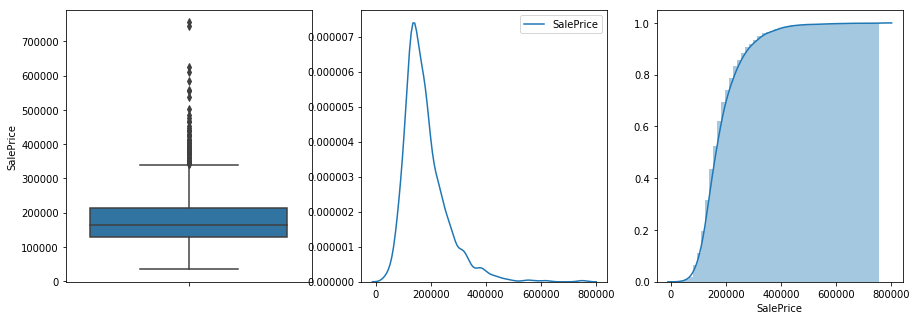

In [728]:
fig,ax  =  plt.subplots(ncols=3)
fig.set_size_inches(15,5)
sns.boxplot(y=hp["SalePrice"], ax=ax[0])
sns.kdeplot(hp["SalePrice"], ax=ax[1])
sns.distplot(hp["SalePrice"],
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True), ax=ax[2])

from sklearn.preprocessing import StandardScaler
from collections import defaultdict
#lc = LabelEncoder()
encoding=defaultdict(StandardScaler)
encoded_df=pd.DataFrame()
for i in df_numeric_columns.columns:
    if(i!='SalePrice'):
        b=df_numeric_columns[i]
        b=pd.DataFrame(b)
        encoding[i].fit(b)
        b=pd.DataFrame(encoding[i].transform(b))
        test_column=b.columns.values
        list1=[i+'_'+'Scaled' for j in test_column]
       # list1=list(list1)
        b.columns=list1
        df_numeric_columns=pd.concat([df_numeric_columns,b],axis=1)
   # d=pd.DataFrame(encoding[i].transform(df_numeric_columns[i]))
    #df_numeric_columns[i]=d

hp.drop(['TotalBsmtSF','GrLivArea','GarageArea','Age_House','Remod_Age_House'],axis=1, inplace=True)
#df_numeric_columns_updated=df_numeric_columns.loc[:,['TotalBsmtSF_Scaled','GrLivArea_Scaled','GarageArea_Scaled','Age_House_Scaled','Remod_Age_House_Scaled']]
hp=pd.concat([hp,df_numeric_columns.loc[:,['TotalBsmtSF_Scaled','GrLivArea_Scaled','GarageArea_Scaled','Age_House_Scaled','Remod_Age_House_Scaled']]],axis=1)

In [729]:
df_numeric_columns.columns

Index(['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice', 'Age_House',
       'Remod_Age_House'],
      dtype='object')

In [730]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
#lc = LabelEncoder()
encoding=defaultdict(LabelEncoder)
encoded_df=pd.DataFrame()
for i in ordinal:
    encoding[i].fit(hp[i])
    d=pd.DataFrame(encoding[i].transform(hp[i]))
    hp[i]=d
    #test_column=d.columns.values
    #list1=[i+'_'+str(j) for j in test_column]
    #d.columns=list1
    #encoded_df=pd.concat([encoded_df,d],axis=1)


In [731]:
# Converting all the label encoded columns to the object from int64
datatypecoversion(ordinal,hp,object)

In [732]:
#http://pbpython.com/categorical-encoding.html

In [733]:
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
encoding=defaultdict(LabelBinarizer)
encoded_df=pd.DataFrame()
list_total_columns=[]
for i in nominal:
    d=pd.DataFrame(encoding[i].fit_transform(hp[i]))
    test_column=d.columns.values
    list1=[i+'_'+str(j) for j in test_column]
    d.columns=list1
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    list_total_columns.append(list1)

hp=pd.concat([hp,encoded_df],axis=1)

##Converting the inner list list_total_columns into a single list
flat_list = [item for sublist in list_total_columns for item in sublist]
datatypecoversion(flat_list,hp,'object')

In [734]:
columns_final=hp.columns

In [735]:
hp.to_csv('PreprocessedData.csv')

In [736]:
hp['SalePrice']=np.log(hp['SalePrice'])

In [737]:
SalePrice=hp['SalePrice']
hp.drop('SalePrice',axis=1,inplace=True)
Y=pd.DataFrame(SalePrice)
X=hp

In [738]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1234)

In [739]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
#print('Coefficients: \n', regr.coef_)
print(regr.score(X_test,y_test))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
#plt.plot(X_test,y_pred, color='blue', linewidth=3)
print('R square:',regr.score(X_test,y_test))

y_test_transformed=np.exp(y_test)
y_pred_transformed=np.exp(y_pred)
get_regression_metrics(y_test_transformed, y_pred_transformed)

0.8752465564398634
Mean squared error: 0.02
Variance score: 0.88
R square: 0.8752465564398634
Mean squared error: 612690942.70
Root Mean squared error: 24752.59
Explained Variance: 0.88
R2 Score: 0.88
Mean Absolute error: 16235.16
Mean Squared Log error: 0.02
Median Absolute error: 12001.90


{'MSE': 612690942.7010745,
 'Mean_Abs_Err': 16235.16214271074,
 'Mean_Sqr_Log_Err': 0.019705529756309882,
 'Median_Abs_Err': 12001.903611184796,
 'R2': 0.8790554975183167,
 'RMSE': 24752.594666036013,
 'Variance_Score': 0.8793014927964996}

In [740]:
get_metric_df(y_test,y_pred)

ValueError: If using all scalar values, you must pass an index

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_test, y_test, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_train, y_train, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))